# Vancouver Crime Analysis
##### by Victor Cuspinera

This is an analysis from the [Vancouver Crime Report](https://www.kaggle.com/agilesifaka/vancouver-crime-report/data) in Kaggle, from a dataset that contains the Vancouver Police Department's crime records **from 2013 to 2019**, which data was collected from the City of Vancouver Open Data Catalogue.

In [293]:
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data

# Need to enable this to allow work with larger datasets (https://altair-viz.github.io/user_guide/faq.html)
alt.data_transformers.enable('json')

#add this because I use jupyter notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [242]:
# download the data
van_crime = pd.read_csv("data/crime_records.csv")

In [243]:
# first view of the data
van_crime.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2003,6,28,13.0,30.0,8XX EXPO BLVD,Central Business District,491771.63,5458295.01
1,Theft from Vehicle,2003,11,17,16.0,0.0,56XX OAK ST,South Cambie,490682.32,5453536.96
2,Theft from Vehicle,2003,12,30,14.0,0.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36
3,Theft of Vehicle,2003,1,15,14.0,45.0,6XX W 41ST AVE,Oakridge,491372.94,5453422.83
4,Theft from Vehicle,2003,12,28,16.0,45.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36
5,Theft from Vehicle,2003,12,12,15.0,30.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36
6,Theft from Vehicle,2003,12,12,13.0,0.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36
7,Theft of Vehicle,2003,1,19,14.0,30.0,6XX W 41ST AVE,Oakridge,491372.94,5453422.83
8,Theft of Vehicle,2003,2,1,10.0,0.0,6XX W 41ST AVE,Oakridge,491372.94,5453422.83
9,Theft from Vehicle,2003,11,5,16.0,30.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36


In [244]:
van_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608815 entries, 0 to 608814
Data columns (total 10 columns):
TYPE             608815 non-null object
YEAR             608815 non-null int64
MONTH            608815 non-null int64
DAY              608815 non-null int64
HOUR             547782 non-null float64
MINUTE           547782 non-null float64
HUNDRED_BLOCK    608802 non-null object
NEIGHBOURHOOD    545333 non-null object
X                608815 non-null float64
Y                608815 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 46.4+ MB


In [245]:
van_crime.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,608815.000000,608815.000000,608815.000000,547782.000000,547782.000000,608815.000000,6.088150e+05
mean,2010.329796,6.466657,15.390511,13.723485,17.092035,442884.965919,4.909681e+06
std,5.053476,3.403654,8.743798,6.751120,18.455757,147854.915444,1.638825e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,4.000000,8.000000,9.000000,0.000000,490011.835000,5.453756e+06
50%,2010.000000,6.000000,15.000000,15.000000,11.000000,491526.360000,5.456901e+06
75%,2015.000000,9.000000,23.000000,19.000000,30.000000,493496.230000,5.458680e+06
max,2019.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


In [246]:
van_crime = van_crime.rename(columns = {'TYPE': 'Crime',
                                        'NEIGHBOURHOOD': 'Neigbourhood',
                                        'HUNDRED_BLOCK': 'Block',
                                        'X': 'GPS_lon',
                                        'Y': 'GPS_lat',
                                        'HOUR': 'Hour',
                                        'MINUTE': 'Minute',
                                        'YEAR': 'Year',
                                        'MONTH': 'Month',
                                        'DAY': 'Day'})
van_crime['Date'] = pd.to_datetime({'year': van_crime['Year'],
                                    'month': van_crime['Month'],
                                    'day': van_crime['Day']})
#van_crime['Time'] = pd.to_timedelta({'hour': van_crime['HOUR'],
#                                    'minute': van_crime['MINUTE']})
#van_crime = van_crime.drop(columns = ['YEAR', 'MONTH', 'DAY'])
van_crime = van_crime.set_index('Date')
van_crime['day_of_week'] = van_crime.index.day_name()
van_crime = van_crime.reset_index()
van_crime

,Date,Crime,Year,Month,Day,Hour,Minute,Block,Neigbourhood,GPS_lon,GPS_lat,day_of_week
0,2003-06-28,Theft from Vehicle,2003,6,28,13.0,30.0,8XX EXPO BLVD,Central Business District,491771.63,5458295.01,Saturday
1,2003-11-17,Theft from Vehicle,2003,11,17,16.0,0.0,56XX OAK ST,South Cambie,490682.32,5453536.96,Monday
2,2003-12-30,Theft from Vehicle,2003,12,30,14.0,0.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36,Tuesday
3,2003-01-15,Theft of Vehicle,2003,1,15,14.0,45.0,6XX W 41ST AVE,Oakridge,491372.94,5453422.83,Wednesday
4,2003-12-28,Theft from Vehicle,2003,12,28,16.0,45.0,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
608810,2019-02-22,Theft from Vehicle,2019,2,22,23.0,0.0,10XX BARCLAY ST,West End,490848.76,5458857.79,Friday
608811,2019-05-30,Offence Against a Person,2019,5,30,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,Thursday
608812,2019-05-15,Break and Enter Residential/Other,2019,5,15,9.0,26.0,13XX E BROADWAY AVE,Grandview-Woodland,494473.53,5456631.32,Wednesday
608813,2019-02-27,Theft of Bicycle,2019,2,27,20.0,15.0,34XX LANGFORD AVE,Killarney,497898.02,5451336.11,Wednesday


In [247]:
# change the order of the columns
van_crime = van_crime.iloc[:, [0, 1, 7, 8, 9, 10, 2, 3, 4, 5, 6, 11]]

In [248]:
van_crime.head()

,Date,Crime,Block,Neigbourhood,GPS_lon,GPS_lat,Year,Month,Day,Hour,Minute,day_of_week
0,2003-06-28,Theft from Vehicle,8XX EXPO BLVD,Central Business District,491771.63,5458295.01,2003,6,28,13.0,30.0,Saturday
1,2003-11-17,Theft from Vehicle,56XX OAK ST,South Cambie,490682.32,5453536.96,2003,11,17,16.0,0.0,Monday
2,2003-12-30,Theft from Vehicle,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36,2003,12,30,14.0,0.0,Tuesday
3,2003-01-15,Theft of Vehicle,6XX W 41ST AVE,Oakridge,491372.94,5453422.83,2003,1,15,14.0,45.0,Wednesday
4,2003-12-28,Theft from Vehicle,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36,2003,12,28,16.0,45.0,Sunday


In [249]:
van_crime['Crime'].unique()

array(['Theft from Vehicle', 'Theft of Vehicle',
       'Break and Enter Residential/Other', 'Mischief',
       'Offence Against a Person',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Other Theft', 'Homicide',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Break and Enter Commercial', 'Theft of Bicycle'], dtype=object)

In [250]:
index_to_drop = van_crime[van_crime['Crime'].str.contains('Break | Collision') == 1].index

In [251]:
van_crime = van_crime.drop(index = index_to_drop.values)
van_crime

,Date,Crime,Block,Neigbourhood,GPS_lon,GPS_lat,Year,Month,Day,Hour,Minute,day_of_week
0,2003-06-28,Theft from Vehicle,8XX EXPO BLVD,Central Business District,491771.63,5458295.01,2003,6,28,13.0,30.0,Saturday
1,2003-11-17,Theft from Vehicle,56XX OAK ST,South Cambie,490682.32,5453536.96,2003,11,17,16.0,0.0,Monday
2,2003-12-30,Theft from Vehicle,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36,2003,12,30,14.0,0.0,Tuesday
3,2003-01-15,Theft of Vehicle,6XX W 41ST AVE,Oakridge,491372.94,5453422.83,2003,1,15,14.0,45.0,Wednesday
4,2003-12-28,Theft from Vehicle,85XX STANLEY PARK DR,Stanley Park,489104.19,5460347.36,2003,12,28,16.0,45.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
608809,2019-03-03,Theft of Bicycle,34XX MAIN ST,Riley Park,492664.83,5455692.60,2019,3,3,2.0,0.0,Sunday
608810,2019-02-22,Theft from Vehicle,10XX BARCLAY ST,West End,490848.76,5458857.79,2019,2,22,23.0,0.0,Friday
608811,2019-05-30,Offence Against a Person,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,2019,5,30,NaN,NaN,Thursday
608813,2019-02-27,Theft of Bicycle,34XX LANGFORD AVE,Killarney,497898.02,5451336.11,2019,2,27,20.0,15.0,Wednesday


In [252]:
van_crime['Crime'].unique()

array(['Theft from Vehicle', 'Theft of Vehicle', 'Mischief',
       'Offence Against a Person', 'Other Theft', 'Homicide',
       'Theft of Bicycle'], dtype=object)

In [253]:
van_crime['Neigbourhood'].unique()

array(['Central Business District', 'South Cambie', 'Stanley Park',
       'Oakridge', 'Kensington-Cedar Cottage', 'Fairview',
       'Grandview-Woodland', 'Kitsilano', nan, 'Hastings-Sunrise',
       'West End', 'Marpole', 'Mount Pleasant', 'Sunset', 'Killarney',
       'Riley Park', 'Arbutus Ridge', 'Shaughnessy', 'Kerrisdale',
       'West Point Grey', 'Dunbar-Southlands', 'Victoria-Fraserview',
       'Renfrew-Collingwood', 'Strathcona', 'Musqueam'], dtype=object)

In [254]:
van_crime.describe()

,GPS_lon,GPS_lat,Year,Month,Day,Hour,Minute
count,480237.000000,4.802370e+05,480237.000000,480237.000000,480237.000000,419204.000000,419204.000000
mean,429652.924602,4.763378e+06,2010.483703,6.458165,15.375275,14.173526,16.227975
std,163959.594925,1.817546e+06,5.085449,3.384539,8.748128,6.670222,18.251897
min,0.000000,0.000000e+00,2003.000000,1.000000,1.000000,0.000000,0.000000
25%,489896.390000,5.453579e+06,2006.000000,4.000000,8.000000,10.000000,0.000000
50%,491445.910000,5.457014e+06,2010.000000,6.000000,15.000000,16.000000,8.000000
75%,493201.590000,5.458716e+06,2015.000000,9.000000,23.000000,19.000000,30.000000
max,498294.120000,5.462300e+06,2019.000000,12.000000,31.000000,23.000000,59.000000


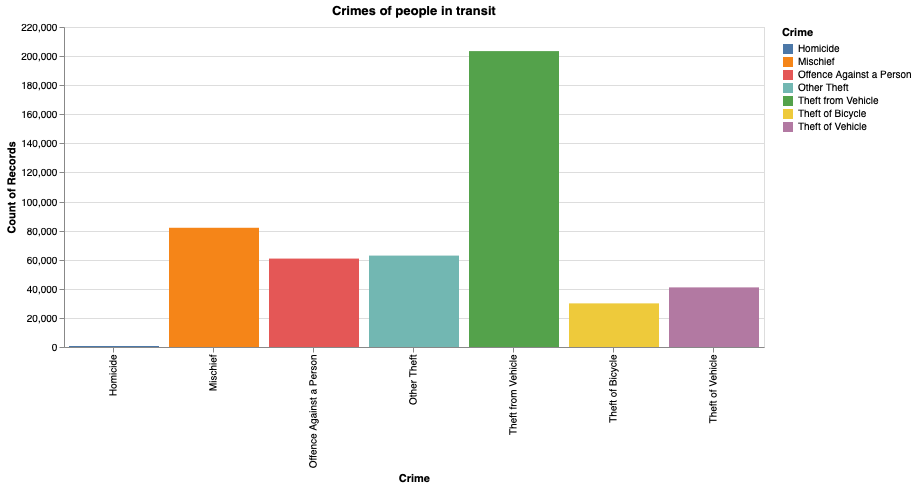

In [297]:
# Which are the most crimes of people in transit going on?

alt.Chart(van_crime).mark_bar().encode(
    alt.X("Crime"),
    y='count()',
    color='Crime'
).properties(
    title = "Crimes of people in transit",
    width=700,
    height=320
)

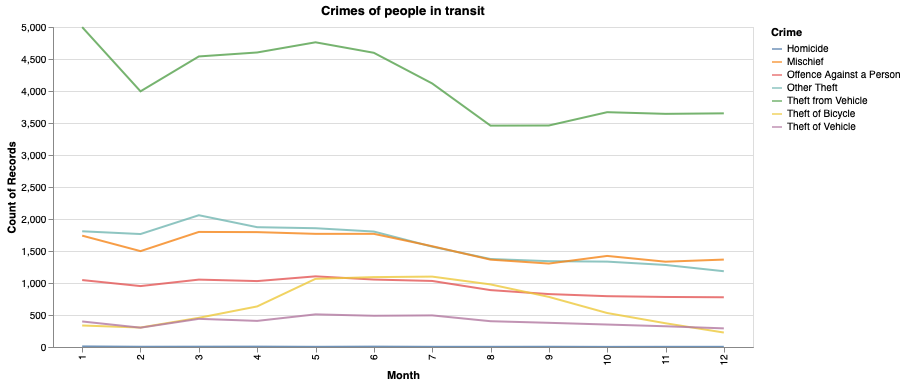

In [274]:
# Which are the most crimes of people in transit going on?
last_4_years = van_crime["Year"].isin(['2019', '2018', '2017', '2016'])

alt.Chart(van_crime[last_4_years]).mark_line(
    opacity=0.8
).encode(
    alt.X('Month:O'),# bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=None),
    alt.Color('Crime'),
).properties(
    title = "Crimes of people in transit",
    width=700,
    height=320
)

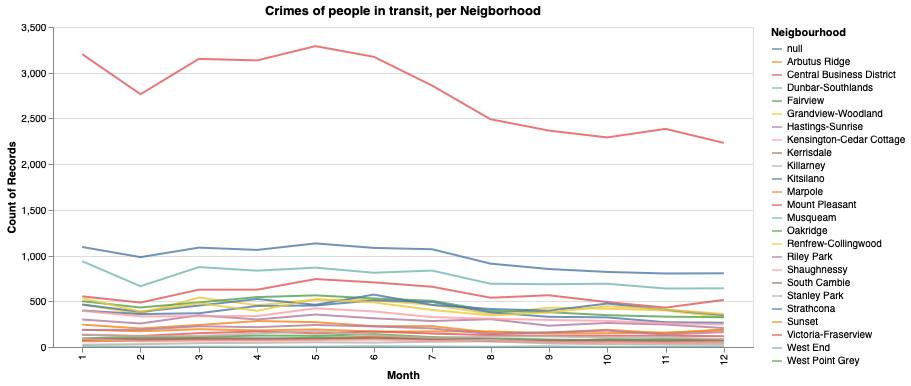

In [298]:
# Which are the most crimes of people in transit going on?
last_4_years = van_crime["Year"].isin(['2019', '2018', '2017', '2016'])

alt.Chart(van_crime[last_4_years]).mark_line(
    opacity=0.8
).encode(
    alt.X('Month:O'),# bin=alt.Bin(maxbins=30)),
    alt.Y('count()', stack=None),
    alt.Color('Neigbourhood'),
).properties(
    title = "Crimes of people in transit, per Neigborhood",
    width=700,
    height=320
)   

# THE .interactive()  IS NOT WORKING

In [282]:
# where are more crimes for transit people in Vancouver
alt.Chart(van_crime).mark_line(
    x="Neigbourhood",
    y="count()"
).properties(
    title = "Crimes of people in transit by Neigborhood",
    width=700,
    height=320
)


TypeError: sequence item 1: expected str instance, int found

In [299]:
jdf = pd.read_json('https://raw.githubusercontent.com/vega/vega-datasets/master/data/jobs.json')

In [321]:
jdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 5 columns):
job      7650 non-null object
sex      7650 non-null object
year     7650 non-null int64
count    7650 non-null int64
perc     7650 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 299.0+ KB


In [303]:
jdf['sex'].unique()

array(['men', 'women'], dtype=object)

In [322]:
jdf['job'].unique()

array(['Accountant / Auditor', 'Actor', 'Advertising Agent', 'Agent',
       'Apprentice', 'Apprentice - Auto Mechanic',
       'Apprentice - Bricklayer', 'Apprentice - Carpenter',
       'Apprentice - Construction', 'Apprentice - Electrician',
       'Apprentice - Machinist', 'Apprentice - Mechanic',
       'Apprentice - Metal Working', 'Apprentice - Plumber',
       'Apprentice - Printing', 'Architect', 'Artist / Art Teacher',
       'Athlete', 'Auctioneer', 'Author', 'Baggageman', 'Baker',
       'Bank Teller', 'Barber / Beautician', 'Bartender',
       'Bill Collector', 'Blacksmith', 'Blaster', 'Boarding House Keeper',
       'Boatman', 'Boilermaker', 'Bookbinder', 'Bookkeeper', 'Bootblack',
       'Building Manager', 'Bus Driver', 'Buyer - Farm', 'Buyer - Store',
       'Cabinet Maker', 'Car Washer', 'Carpenter', 'Cashier',
       'Cement / Concrete Finisher', 'Chainman', 'Charwoman', 'Chemist',
       'Chiropractor', 'Clergyman', 'Clerical Worker',
       'College President / Dea

In [304]:
jdf['year'].unique()

array([1850, 1860, 1870, 1880, 1900, 1910, 1920, 1930, 1940, 1950, 1960,
       1970, 1980, 1990, 2000])

In [312]:
jdf.groupby('year').agg('sum')


,count,perc
year,,
1850,5406202,1.0
1860,8434434,1.0
1870,13129039,1.0
1880,18307283,1.0
1900,29689771,1.0
1910,38928902,1.0
1920,41988463,1.0
1930,48730176,1.0
1940,52031277,1.0


In [320]:
jdf[jdf['perc'] >=0.44687]

,job,sex,year,count,perc
2670,Farmer,men,1850,2415878,0.446872


In [342]:
select = jdf["year"].isin(['2000'])
jdf_2000 = jdf[select].groupby(['year', 'job']).agg('sum')
jdf_2000

#select2 = jdf["year"].isin(['2000'])
#jdf_2000 = jdf[select].groupby(['year', 'job']).agg('sum')

count      perc
year job                                    
2000 Accountant / Auditor  2084056  0.012396
     Actor                   55906  0.000333
     Advertising Agent      246831  0.001468
     Agent                       0  0.000000
     Apprentice                  0  0.000000
...                            ...       ...
     Usher                   84674  0.000504
     Veterinarian            65067  0.000387
     Waiter / Waitress     2439278  0.014509
     Weaver                  49815  0.000296
     Welder                 790602  0.004703

[255 rows x 2 columns]

In [360]:
y = 2000

select = jdf["year"].isin([y])
jdf_ = jdf[select].groupby('job').agg('sum').sort_values(by="count", ascending=False) #.head(10)
#sort_values(by="count", ascending=False).head(10)
jdf_.head(10)



,year,count,perc
job,,,
Manager / Owner,4000,18425015,0.109593
Clerical Worker,4000,12984890,0.077235
Operative,4000,10037698,0.059705
Salesman,4000,7934006,0.047192
Teacher,4000,5862851,0.034873
Laborer,4000,5572156,0.033143
Professional - Misc,4000,5425977,0.032274
Secretary,4000,5020851,0.029864
Cook,4000,4390016,0.026112


In [345]:
jdf_2000.sort_values(by="count", ascending=False).head(10)



count      perc
year job                                    
2000 Manager / Owner      18425015  0.109593
     Clerical Worker      12984890  0.077235
     Operative            10037698  0.059705
     Salesman              7934006  0.047192
     Teacher               5862851  0.034873
     Laborer               5572156  0.033143
     Professional - Misc   5425977  0.032274
     Secretary             5020851  0.029864
     Cook                  4390016  0.026112
     Cashier               4323404  0.025716

In [368]:
jdf_filter_3 = jdf.pivot_table(index=['job', 'year'], columns='sex', values='count')
jdf_filter_3['sex_diff'] = (jdf_filter_3['men'] - jdf_filter_3['women']) / (jdf_filter_3['men'] + jdf_filter_3['women'])
jdf_filter_3 = jdf_filter_3.reset_index("year")
jdf_filter_3 = jdf_filter_3[jdf_filter_3["year"].isin([1850, 1880, 1910, 1940, 1970, 2000])]

XXX = alt.Chart(
    jdf_filter_3, 
    width=100, 
    title="Difference Between Ratio Men to Ratio Women in All Occupations"
).mark_circle(
    size=15, 
    opacity=0.5, 
    color='darkblue'
).encode(
    alt.X(
        "jitter:Q", 
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        title=None,
        scale=alt.Scale()),
    alt.Y(
        "sex_diff:Q", 
        title='Ratio Men Minus Ratio Women'),
    column=alt.Column(
        "year:N",
        title ="Year",
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=4))
).transform_calculate(
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)


#alt.Chart(source)


XXX + alt.Chart(jdf_filter_3).mark_boxplot().encode(
    x='jitter:Q',
    y='sex_diff:Q'
)



ValueError: Objects with "config" attribute cannot be used within LayerChart. Consider defining the config attribute in the LayerChart object instead.